# **SpikeInterface pipeline**

**SpikeInterface documentation:** https://spikeinterface.readthedocs.io/en/stable/overview.html

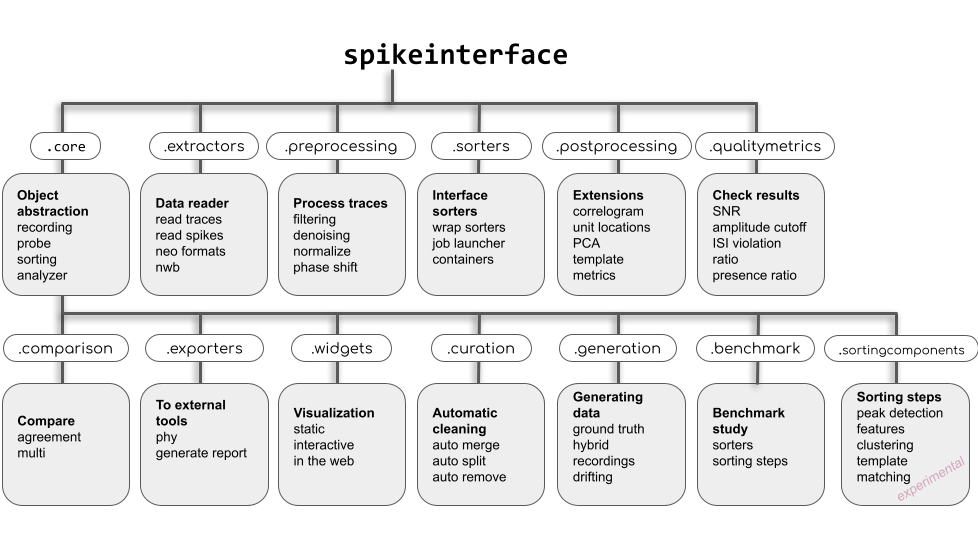


In [1]:
import spikeinterface.full as si
from spikeinterface.preprocessing import bandpass_filter, common_reference
import matplotlib.pylab as plt
import random, numpy as np, torch

# Fix all seeds in Python
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# **DREDge: Motion correction**

**High level pipeline for motion correction using DREDge:** https://spikeinterface.readthedocs.io/en/latest/how_to/handle_drift.html

**Low level pipeline for motion correction using DREDge:** https://spikeinterface.readthedocs.io/en/latest/modules/sortingcomponents.html#motion-interpolation


In [2]:
raw_rec1 = si.read_spikeglx(r"J:\project_trainingAggression\Data\20250817_mouse975826\Day01\neuralData\catgt_20250817_m975826_obs1_g0\20250817_m975826_obs1_g0_imec0", stream_name='imec0.ap', load_sync_channel=False)
raw_rec2 = si.read_spikeglx(r"J:\project_trainingAggression\Data\20250817_mouse975826\Day01\neuralData\catgt_20250817_m975826_obs1_g0\20250817_m975826_obs1_g0_imec1", stream_name='imec1.ap', load_sync_channel=False)
raw_rec3 = si.read_spikeglx(r"J:\project_trainingAggression\Data\20250817_mouse975826\Day01\neuralData\catgt_20250817_m975826_obs1_g0\20250817_m975826_obs1_g0_imec2", stream_name='imec2.ap', load_sync_channel=False)


In [3]:
#raw_rec = si.phase_shift(recording=raw_rec) #This is SpikeInterface way of doing CatGT
recording_f1 = bandpass_filter(recording=raw_rec1, freq_min=300, freq_max=6000)
rec_cmr1 = common_reference(recording=recording_f1, operator="median", reference="global")

#raw_rec = si.phase_shift(recording=raw_rec) #This is SpikeInterface way of doing CatGT
recording_f2 = bandpass_filter(recording=raw_rec2, freq_min=300, freq_max=6000)
rec_cmr2 = common_reference(recording=recording_f2, operator="median", reference="global")

#raw_rec = si.phase_shift(recording=raw_rec) #This is SpikeInterface way of doing CatGT
recording_f3 = bandpass_filter(recording=raw_rec3, freq_min=300, freq_max=6000)
rec_cmr3 = common_reference(recording=recording_f3, operator="median", reference="global")

folder1 = r"C:\Users\Data Analysis\Desktop\project_trainingAggression\DredgeTest_imec0"
folder2 = r"C:\Users\Data Analysis\Desktop\project_trainingAggression\DredgeTest_imec1"
folder3 = r"C:\Users\Data Analysis\Desktop\project_trainingAggression\DredgeTest_imec2"

motion, motion_info = si.compute_motion(rec_cmr1, 
                                        preset="dredge", 
                                        folder=folder1, 
                                        output_motion_info=True,
                                        n_jobs = 16)

motion, motion_info = si.compute_motion(rec_cmr2, 
                                        preset="dredge", 
                                        folder=folder2, 
                                        output_motion_info=True,
                                        n_jobs = 16)

motion, motion_info = si.compute_motion(rec_cmr3, 
                                        preset="dredge", 
                                        folder=folder3, 
                                        output_motion_info=True,
                                        n_jobs = 16)

noise_level (no parallelization):   0%|          | 0/20 [00:00<?, ?it/s]

detect and localize (workers: 16 processes):   0%|          | 0/1206 [00:00<?, ?it/s]

Cross correlation:   0%|          | 0/9 [00:00<?, ?it/s]

Solve:   0%|          | 0/8 [00:00<?, ?it/s]

noise_level (no parallelization):   0%|          | 0/20 [00:00<?, ?it/s]

detect and localize (workers: 16 processes):   0%|          | 0/1206 [00:00<?, ?it/s]

Cross correlation:   0%|          | 0/9 [00:00<?, ?it/s]

Solve:   0%|          | 0/8 [00:00<?, ?it/s]

noise_level (no parallelization):   0%|          | 0/20 [00:00<?, ?it/s]

detect and localize (workers: 16 processes):   0%|          | 0/1206 [00:00<?, ?it/s]

Cross correlation:   0%|          | 0/9 [00:00<?, ?it/s]

Solve:   0%|          | 0/8 [00:00<?, ?it/s]

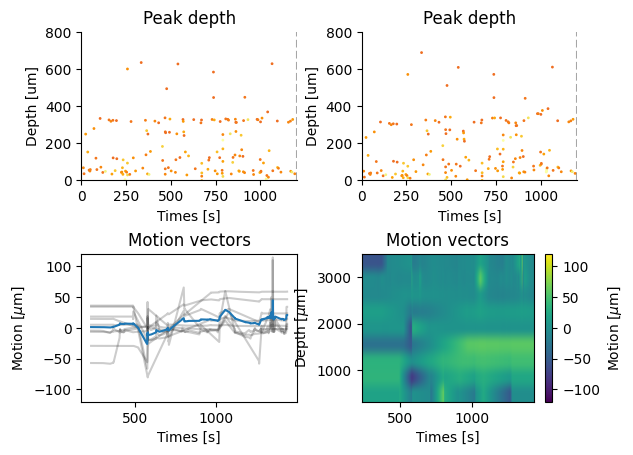

In [4]:
motion_info1 = si.load_motion_info(folder1)

si.plot_motion_info(
    motion_info1, recording_f1,
    depth_lim=(0, 800),
    color_amplitude=True,
    amplitude_cmap="inferno",
    scatter_decimate=10,
)

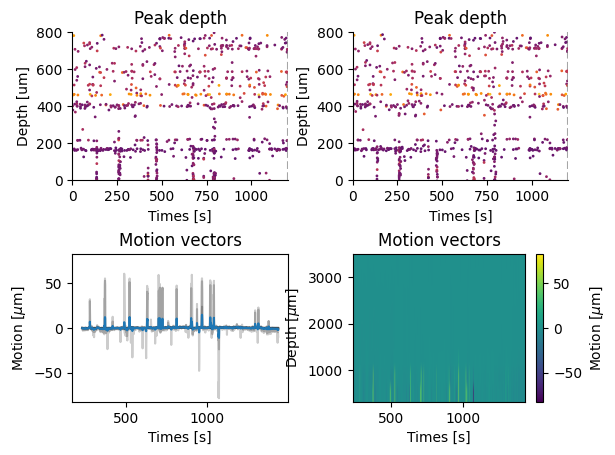

In [5]:
motion_info2 = si.load_motion_info(folder2)

si.plot_motion_info(
    motion_info2,recording_f2,
    depth_lim=(0, 800),
    color_amplitude=True,
    amplitude_cmap="inferno",
    scatter_decimate=10,
)

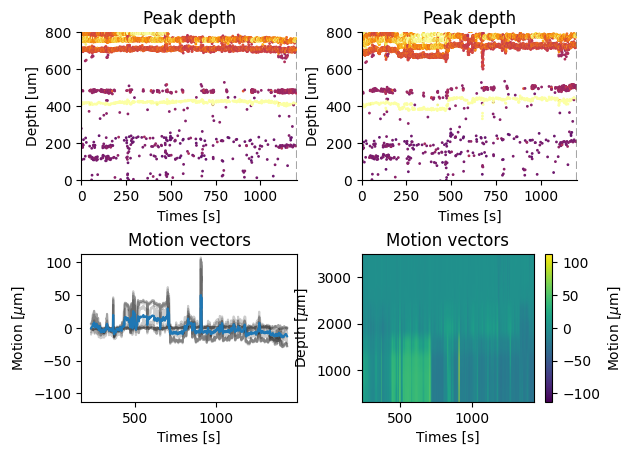

In [6]:
motion_info3 = si.load_motion_info(folder3)

si.plot_motion_info(
    motion_info3, recording_f3,
    depth_lim=(0, 800),
    color_amplitude=True,
    amplitude_cmap="inferno",
    scatter_decimate=10,
)

In [7]:
from spikeinterface.sortingcomponents.motion import interpolate_motion
preset = "dredge"
motion_info1 = si.load_motion_info(folder1)
motion1 = motion_info1['motion']
interpolated_recording1 = interpolate_motion(recording=rec_cmr1.astype('float32'), 
                                            motion=motion1)
interpolated_recording1

interpolate_motion (InterpolateMotionRecording): 366 channels - 30000.871548 Hz - 1 segments 
                    36,151,050 samples - 1,205.00s (20.08 minutes) - float32 dtype - 49.29 GiB

In [8]:
preset = "dredge"
motion_info2 = si.load_motion_info(folder2)
motion2 = motion_info2['motion']
interpolated_recording2 = interpolate_motion(recording=rec_cmr2.astype('float32'), 
                                            motion=motion2)
interpolated_recording2

interpolate_motion (InterpolateMotionRecording): 374 channels - 30000.656485 Hz - 1 segments 
                    36,150,791 samples - 1,205.00s (20.08 minutes) - float32 dtype - 50.37 GiB

In [9]:
preset = "dredge"
motion_info3 = si.load_motion_info(folder3)
motion3 = motion_info3['motion']
interpolated_recording3 = interpolate_motion(recording=rec_cmr3.astype('float32'), 
                                            motion=motion3)
interpolated_recording3

interpolate_motion (InterpolateMotionRecording): 378 channels - 30000.660669 Hz - 1 segments 
                    36,150,796 samples - 1,205.00s (20.08 minutes) - float32 dtype - 50.91 GiB

# **Spike sorting: Kilosort4**

In [10]:
interpolated_recording2.get_sampling_frequency()

30000.65648535565

In [18]:
rec_mc_w1 = (interpolated_recording1)
rec_mc_w2 = (interpolated_recording2)
rec_mc_w3 = (interpolated_recording3)

params_kilosort4 = {'do_CAR': False,
                    'skip_kilosort_preprocessing': False,
                    'highpass_cutoff': 0.1,
                    'do_correction': False,
                    'torch_device':'cuda',
                    'fs': interpolated_recording3.get_sampling_frequency(),
                    'delete_recording_dat': False,
                    'n_jobs': 16}

sorting1 = si.run_sorter('kilosort4', 
                        rec_mc_w1, 
                        folder=f"{folder1}/kilosort4_imec000", 
                        verbose=True, 
                        **params_kilosort4)
sorting2 = si.run_sorter('kilosort4', 
                        rec_mc_w2, 
                        folder=f"{folder2}/kilosort4_imec11", 
                        verbose=True, 
                        **params_kilosort4)
sorting3 = si.run_sorter('kilosort4', 
                        rec_mc_w3, 
                        folder=f"{folder3}/kilosort4_imec22", 
                        verbose=True, 
                        **params_kilosort4)


write_binary_recording (workers: 16 processes):   0%|          | 0/1206 [00:00<?, ?it/s]

kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 36151050
kilosort.run_kilosort: N seconds: 1204.999992817503
kilosort.run_kilosort: N batches: 603


Skipping common average reference.


kilosort.run_kilosort: Preprocessing filters computed in 3.40s; total 3.42s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    25.90 %
kilosort.run_kilosort: Mem used:     25.40 %     |      32.52 GB
kilosort.run_kilosort: Mem avail:    95.48 / 128.00 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   51.60 %     |      6.19   /    12.00 GB
kilosort.run_kilosort: Allocated:    17.99 %     |      2.16   /    12.00 GB
kilosort.run_kilosort: Max alloc:    28.30 %     |      3.40   /    12.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------

Skipping drift correction.


kilosort.spikedetect: Number of universal templates: 1456
kilosort.spikedetect: Detecting spikes...
100%|██████████| 603/603 [09:17<00:00,  1.08it/s]
kilosort.run_kilosort: 1882860 spikes extracted in 562.21s; total 565.89s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after spike detect (univ)
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    11.10 %
kilosort.run_kilosort: Mem used:     27.50 %     |      35.23 GB
kilosort.run_kilosort: Mem avail:    92.77 / 128.00 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   70.66 %     |      8.48   /    12.00 GB
kilosort.run_kilosort: Allocated:    18.00 %     |      2.16   /    12.00 GB
kilosort.run_kilosort: Max alloc:    44.19 %     |      5.30   /    12.00 GB
kilosort.run_kilosort: ************************************

kilosort4 run time 1040.86s


write_binary_recording (workers: 16 processes):   0%|          | 0/1206 [00:00<?, ?it/s]

kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 36150791
kilosort.run_kilosort: N seconds: 1204.999997838262
kilosort.run_kilosort: N batches: 603


Skipping common average reference.


kilosort.run_kilosort: Preprocessing filters computed in 3.85s; total 3.85s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    24.40 %
kilosort.run_kilosort: Mem used:     28.00 %     |      35.89 GB
kilosort.run_kilosort: Mem avail:    92.11 / 128.00 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   70.74 %     |      8.49   /    12.00 GB
kilosort.run_kilosort: Allocated:     0.07 %     |      0.01   /    12.00 GB
kilosort.run_kilosort: Max alloc:    10.60 %     |      1.27   /    12.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------

Skipping drift correction.


kilosort.spikedetect: Number of universal templates: 1488
kilosort.spikedetect: Detecting spikes...
100%|██████████| 603/603 [09:23<00:00,  1.07it/s]
kilosort.run_kilosort: 3957900 spikes extracted in 570.68s; total 574.93s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after spike detect (univ)
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     0.00 %
kilosort.run_kilosort: Mem used:     28.70 %     |      36.76 GB
kilosort.run_kilosort: Mem avail:    91.24 / 128.00 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |     12.00   /    12.00 GB
kilosort.run_kilosort: Allocated:     0.08 %     |      0.01   /    12.00 GB
kilosort.run_kilosort: Max alloc:    26.87 %     |      3.22   /    12.00 GB
kilosort.run_kilosort: ***********************************

kilosort4 run time 2036.20s


write_binary_recording (workers: 16 processes):   0%|          | 0/1206 [00:00<?, ?it/s]

kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 36150796
kilosort.run_kilosort: N seconds: 1204.9999964435929
kilosort.run_kilosort: N batches: 603


Skipping common average reference.


kilosort.run_kilosort: Preprocessing filters computed in 3.72s; total 3.72s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    16.60 %
kilosort.run_kilosort: Mem used:     28.20 %     |      36.14 GB
kilosort.run_kilosort: Mem avail:    91.86 / 128.00 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |     12.00   /    12.00 GB
kilosort.run_kilosort: Allocated:     0.07 %     |      0.01   /    12.00 GB
kilosort.run_kilosort: Max alloc:    10.72 %     |      1.29   /    12.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ---------------------------------

Skipping drift correction.


kilosort.spikedetect: Number of universal templates: 1504
kilosort.spikedetect: Detecting spikes...
100%|██████████| 603/603 [1:04:24<00:00,  6.41s/it]
kilosort.run_kilosort: 3695826 spikes extracted in 3870.59s; total 3874.54s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after spike detect (univ)
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     8.30 %
kilosort.run_kilosort: Mem used:     29.70 %     |      37.96 GB
kilosort.run_kilosort: Mem avail:    90.04 / 128.00 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |     12.00   /    12.00 GB
kilosort.run_kilosort: Allocated:     0.08 %     |      0.01   /    12.00 GB
kilosort.run_kilosort: Max alloc:    27.16 %     |      3.26   /    12.00 GB
kilosort.run_kilosort: *******************************

kilosort4 run time 5164.33s


In [ ]:
import numpy as np

ops = np.load(r'C:\Users\Data Analysis\Desktop\project_trainingAggression\DredgeTest_imec1\kilosort4_imec1\sorter_output\ops.npy', allow_pickle=True).item()
sr = ops.get('fs', ops.get('sample_rate', None))
if sr is None:
    raise KeyError("Couldn't find 'fs' or 'sample_rate' in ops.npy")

if 'Nchan' in ops:
    nchan = int(ops['Nchan'])
elif 'connected' in ops:
    nchan = int(np.sum(ops['connected']))
elif 'chanMap' in ops:
    nchan = int(len(ops['chanMap']))
else:
    raise KeyError("Couldn't infer #channels from ops (no Nchan/connected/chanMap).")

print("Sampling frequency (Hz):", sr)
print("# channels used:", nchan)

Sampling frequency (Hz): 30000.65648535565
# channels used: 374
